# Critical Factors in Hospital Satifaction Surveys

The HCAHPS (the Hospital Consumer Assessment of Healthcare Providers and Systems) is a patient satisfaction 
survey required by CMS (the Centers for Medicare and Medicaid Services) for all hospitals in the United States.

This paper will explore the survey data of the HCAHPS to identify actionable trends for hostpials to focus upon.
The HCAHAPS breaks down survey questions into 9 service categories:
    
    1. Communication with doctors
    2. Communication with nurses
    3. Responsiveness of hospital staff
    4. Pain management
    5. Communication about medicines
    6. Discharge information
    7. Cleanliness of the hospital environment
    8. Quietness of the hospital environment
    9. Transition of care
    
The HCAHPS also includes a question regarding whether patients would reccommend the hospital to family or friends.
The results include a positive 'YES' percentage, a nagative 'NO' percentage and a neutral percentage.  This
study will create linear regressions to evaluate correlations between the various survey questions and the 
likelihood of recommendation.  It will ansswer the following questions:
    
    1. What is relationship between 'YES' and 'NO' answers. (i.e. Are hospitals receiving a high percentage of 
    'YES' also receiving a low percentage of 'NO' responses?)
    
    2. Which categories of questions correspond most to hospitals receiving a 'NO' on the
    recommendation question?
    
    3. What is the correlation between individual questions of the most relavant categories and the individual
    questions within those categories?


In [133]:
import pandas as pd
df = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')
import matplotlib.pyplot as plt
import numpy as np

In [134]:
df.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date', 'Location'],
      dtype='object')

In [135]:
# Data is stored as a series of objects.  
# Column names include blank spaces.  Will replace blank spaces in colun names with a '_'

df.columns = df.columns.str.replace('\s+', '_')

In [136]:
# Creating new dataframe 'yes_rec_df' which corresponds solely to the question of whether patients
# would recommend hospital to friends and family.  The 'HCAHPS_Answer_Percent' columns within this 
# dataframe represent the percentage of respondents who said they would recommend hospital.

yes_rec_df = df[df.HCAHPS_Question == 'Patients who reported YES, they would definitely recommend the hospital']


In [137]:
# Many of the HCAHPS_Aswer_Percent fields contain a a value 'Not Available'.  Those entries
# are removed since they are not relevant and cannot be plotted.

yes_rec_df = yes_rec_df[yes_rec_df.HCAHPS_Answer_Percent != 'Not Available']
len(yes_rec_df)

# len shows we have 4103 records in our list of hospitals with valid percentages to recommend quetion.

4103

In [138]:
# In order to plot histogram of how how hopitals perforomed on recommend question, data 
# is isoltated on percentage variable and converted from object to integer.


rec_percent = yes_rec_df.HCAHPS_Answer_Percent
yes_int = rec_percent.astype(int)


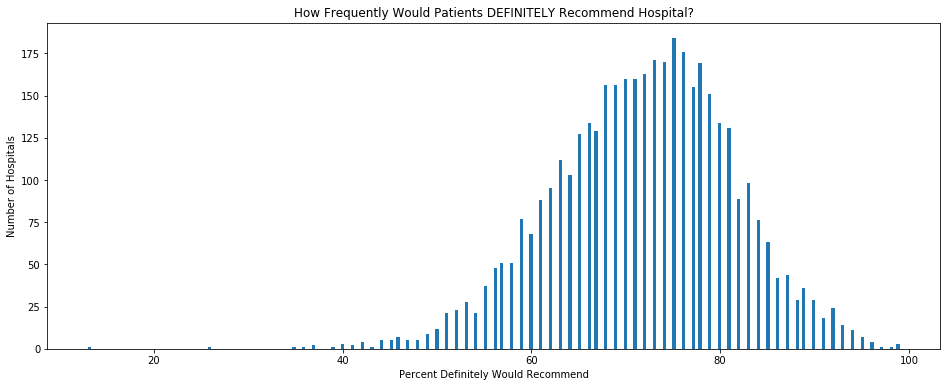

In [139]:
# Histogram showing spread of how likely pateitns are to recommend hospital to family and friends

plt.figure(figsize=(16, 6))
plt.hist(yes_int, bins = 250)
plt.xlabel('Percent Definitely Would Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients DEFINITELY Recommend Hospital?')
plt.show()

In [140]:
# Check mean and standard deviation of YES recommendations

print('Mean - ', yes_int.mean())
print('Standard Deviation - ', yes_int.std())
print('Variance - ', yes_int.var())

Mean -  71.8125761637826
Standard Deviation -  9.549083739335211
Variance -  91.18500026083613


In [141]:
# Doing same thing with 'would not recommend' answers

no_rec_df = df[df.HCAHPS_Question == 'Patients who reported NO, they would probably not or definitely not recommend the hospital']
no_rec_df = no_rec_df[no_rec_df.HCAHPS_Answer_Percent != 'Not Available']
len(no_rec_df)

# 4103 hospitals contain 'no' percentage data, same as with 'yes' data from above

4103

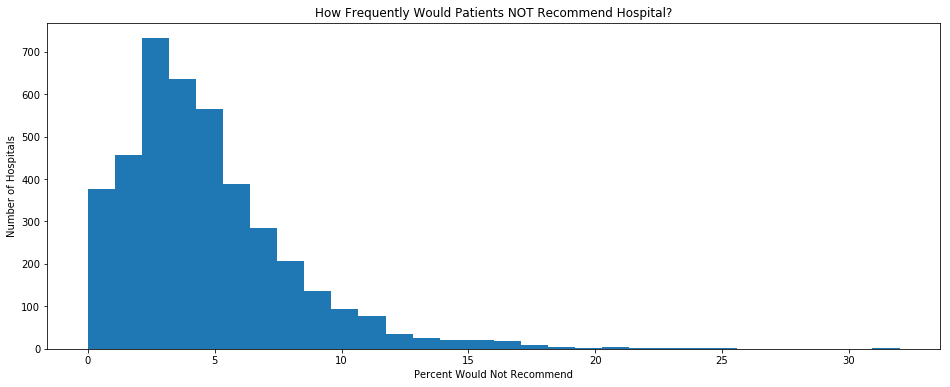

In [142]:
# Generate histogram showing percent of patients who would not recommend hospital

no_rec_percent = no_rec_df.HCAHPS_Answer_Percent
no_int = no_rec_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(no_int, bins = 30)
plt.xlabel('Percent Would Not Recommend')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients NOT Recommend Hospital?')
plt.show()

In [143]:
# Check mean and standard deviation of NO recommendations

print('Mean - ', no_int.mean())
print('Standard Deviation - ', no_int.std())
print('Variance - ', no_int.var())

Mean -  4.872044845235194
Standard Deviation -  3.2550386079561937
Variance -  10.595276339285395


In [144]:
# Hospitals that receive > 10% of patient responses who would not recommend hospital are receiving more than
# twice as many of these nagative ratings as average, and are outside the standard deviation.

# It will be interesting to see correalations between those hospitals receiving unusally high NO
# recommendations and other survey data to determine if certain factors are more likey than others to 
# result in hospitals receiving low recommendation rankings.


slope: -0.0428600154527
intercept: 7.94993296932
r_value: -0.125735490703
p_value: 6.2888000351e-16
std_err 0.00528067161249
r-squared: 0.0158094136222


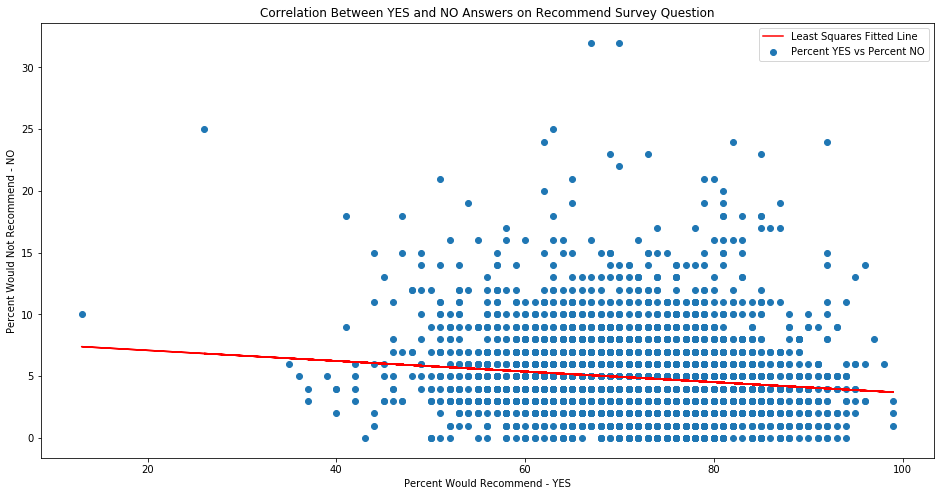

In [145]:
# We will explore scatter plot of 'YES' vs 'NO' answers to determine anomolies in data
# And will plot a least squares linear regression fitted line


from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(yes_int,no_int)

print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err", std_err)
print("r-squared:", r_value**2)

plt.figure(figsize=(16, 8))
plt.scatter(x = yes_int, y = no_int, label = 'Percent YES vs Percent NO')

plt.plot(yes_int, intercept + slope*yes_int, 'r', label='Least Squares Fitted Line')

plt.xlabel('Percent Would Recommend - YES')
plt.ylabel('Percent Would Not Recommend - NO')
plt.title('Correlation Between YES and NO Answers on Recommend Survey Question')
plt.legend()
plt.show()

# Communication with Doctors

In [146]:
# Communication with Doctors (linear mean score) analysis
# Create dataframe

doctor_communication_linear = df[df.HCAHPS_Question == 'Doctor communication - linear mean score']
doctor_communication_linear = doctor_communication_linear[doctor_communication_linear.HCAHPS_Linear_Mean_Value != 'Not Available']
doctor_communication_linear = doctor_communication_linear[doctor_communication_linear.HCAHPS_Linear_Mean_Value != 'Not Applicable']

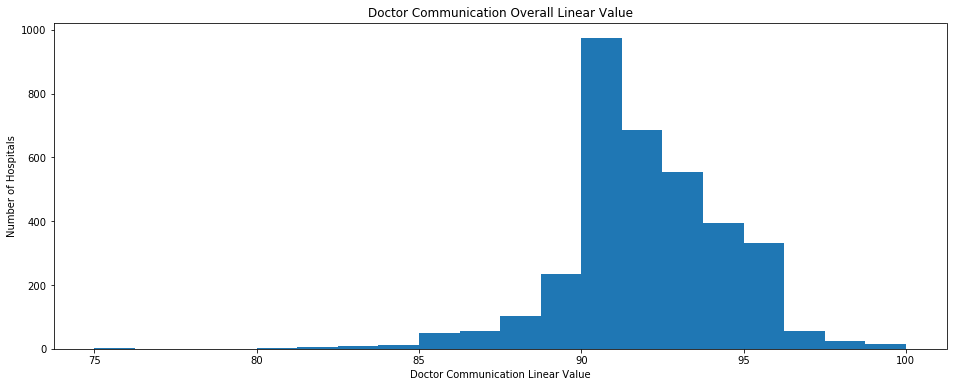

In [147]:
# Graph histogram of overall Doctor Communiction  data

doctor_communication_linear_percent = doctor_communication_linear.HCAHPS_Linear_Mean_Value
DC_int = doctor_communication_linear_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(DC_int, bins = 20)
plt.xlabel('Doctor Communication Linear Value')
plt.ylabel('Number of Hospitals')
plt.title('Doctor Communication Overall Linear Value')
plt.show()

slope: -0.891632149034
intercept: 86.9878669839
r_value: -0.694642583696
p_value: 0.0
std_err 0.0156008241285
r-squared: 0.482528319084


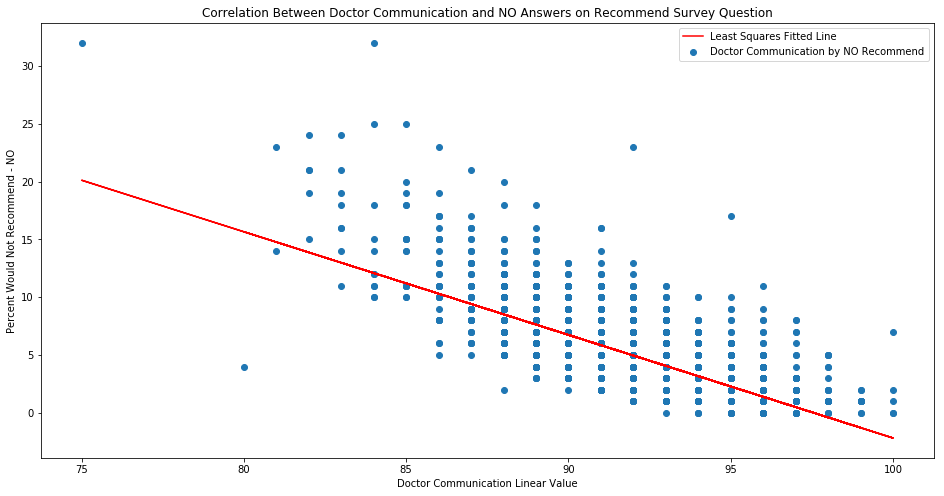

In [148]:
# merge doctor_communication_linear with no_rec_df on shared Provider_ID

# Generate scatterplot and plot least squares fitted line


doctor_pd = pd.merge(doctor_communication_linear, no_rec_df, on='Provider_ID')

d1 = doctor_pd.HCAHPS_Linear_Mean_Value_x
doctor_x = d1.astype(int)

d3 = doctor_pd.HCAHPS_Answer_Percent_y
doctor_y = d3.astype(int)


slope, intercept, r_value, p_value, std_err = stats.linregress(doctor_x, doctor_y)

print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err", std_err)
print("r-squared:", r_value**2)

plt.figure(figsize=(16, 8))
plt.scatter(x = doctor_x, y = doctor_y, label = 'Doctor Communication by NO Recommend')

plt.plot(doctor_x, intercept + slope*doctor_x, 'r', label='Least Squares Fitted Line')

plt.xlabel('Doctor Communication Linear Value')
plt.ylabel('Percent Would Not Recommend - NO')
plt.title('Correlation Between Doctor Communication and NO Answers on Recommend Survey Question')
plt.legend()
plt.show()

# Responsiveness of Hospital Staff

In [149]:
# Staff Resposiveness overall (linear mean score) analysis
# Create dataframe

staff_response_linear = df[df.HCAHPS_Question == 'Staff responsiveness - linear mean score']
staff_response_linear = staff_response_linear[staff_response_linear.HCAHPS_Linear_Mean_Value != 'Not Available']
staff_response_linear = staff_response_linear[staff_response_linear.HCAHPS_Linear_Mean_Value != 'Not Applicable']


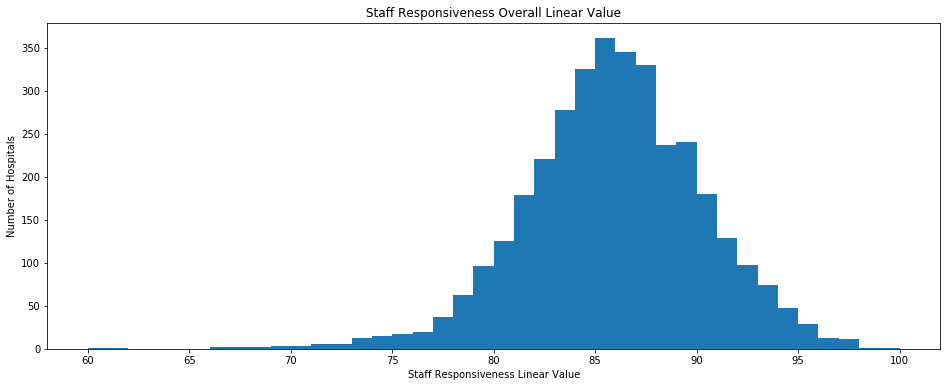

In [150]:
# Graph histogram of overall staff responsiveness data

staff_response_linear_percent = staff_response_linear.HCAHPS_Linear_Mean_Value
srlp_int = staff_response_linear_percent.astype(int)

plt.figure(figsize=(16, 6))
plt.hist(srlp_int, bins = 40)
plt.xlabel('Staff Responsiveness Linear Value')
plt.ylabel('Number of Hospitals')
plt.title('Staff Responsiveness Overall Linear Value')
plt.show()

slope: -0.517787435525
intercept: 49.2670146012
r_value: -0.726274731132
p_value: 0.0
std_err 0.00828023966151
r-squared: 0.52747498508


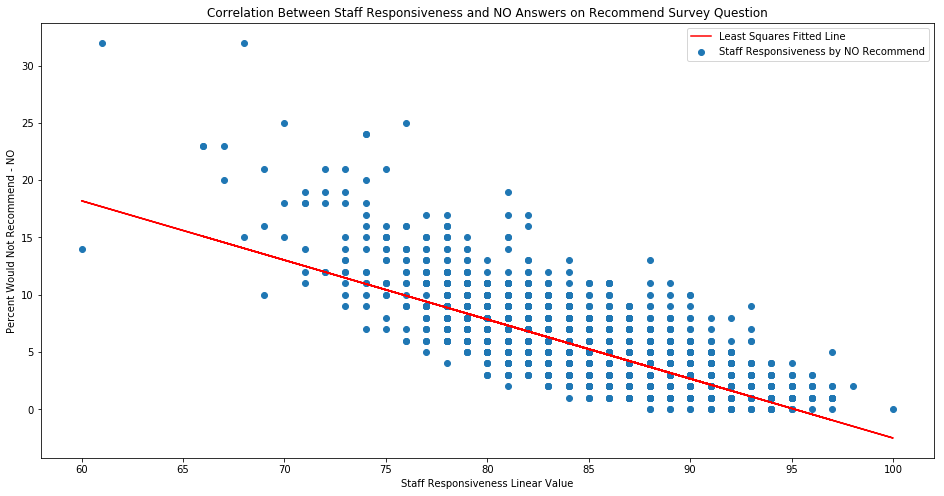

In [151]:
# merge staff_response_linear with no_rec_df on shared Provider_ID

# Generate scatterplot and plot least squares fitted line


staff_pd = pd.merge(staff_response_linear, no_rec_df, on='Provider_ID')

s1 = staff_pd.HCAHPS_Linear_Mean_Value_x
staff_x = s1.astype(int)

s3 = staff_pd.HCAHPS_Answer_Percent_y
staff_y = s3.astype(int)


slope, intercept, r_value, p_value, std_err = stats.linregress(staff_x, staff_y)

print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err", std_err)
print("r-squared:", r_value**2)

plt.figure(figsize=(16, 8))
plt.scatter(x = staff_x, y = staff_y, label = 'Staff Responsiveness by NO Recommend')

plt.plot(staff_x, intercept + slope*staff_x, 'r', label='Least Squares Fitted Line')

plt.xlabel('Staff Responsiveness Linear Value')
plt.ylabel('Percent Would Not Recommend - NO')
plt.title('Correlation Between Staff Responsiveness and NO Answers on Recommend Survey Question')
plt.legend()
plt.show()